In [1]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import networkx as nx
import random
from tqdm import tqdm

In [2]:
def Json_Save(accounts, file_name):
    with open(file_name, 'w') as f:
        json.dump([a.Set_Info() for a in accounts], f)


def Json_Load(file_name):
    with open(file_name, 'r') as file:
        info = json.load(file)
        return [Account.Get_Info(i) for i in info]



class Account:
    def __init__(self, id, name, friends):
        self.id = id
        self.name = name
        self.friends = friends

    def Set_Info(self):
        return {
            'id': self.id,
            'name': self.name,
            'friends': self.friends
        }

    @staticmethod
    def Get_Info(info):
        return Account(id=info['id'], name=info['name'], friends=info['friends'])

In [3]:
accounts = []

df = pd.read_csv("Data.csv")
df.columns = ["full_name", "link", "id"]
df = df.dropna()
df['id'] = df['id'].astype(int).astype(str)

for index, row in df.iterrows():
    accounts.append(Account(row["id"], row["full_name"], None))
df

,full_name,link,id
0,Алабужев Даниил Андреевич,https://vk.com/prospirtovannyy__saharok,172350665
1,Балабанов Дмитрий Сергеевич,https://vk.com/dmittrj,229180632
2,Беликова Екатерина Сергеевна,https://vk.com/belikova257,145195585
3,Белов Даниил Александрович,https://vk.com/belllov,193887357
5,Гуляев Никита Павлович,https://vk.com/llllllllliilll,386272361
6,Гусев Никита Алексеевич,https://vk.com/gusyakus,204720239
7,Денисова Мария Игоревна,https://vk.com/madebymade,162225997
9,Джумъаев Абдувохид Джумъаевич,https://vk.com/id860446539,860446539
10,Егоркин Данила Михайлович,https://vk.com/egorkin_dan1l,472133870
11,Елизаветов Василий Геннадьевич,https://vk.com/id195614586,195614586


In [ ]:
Maximum_Friends = 100
for d in range(2):
    new_accounts = []
    for acco in tqdm(accounts):
        if acco.friends == None:
            url = 'https://api.vk.com/method/friends.get'
            params = {
                    'user_id': acco.id,
                    'v': '5.199' 
            }
            response = requests.get(url, params=params)
            if 'response' not in response.json():
                continue
            all_friends = response.json()['response']['items']
            new_friends_found = 0
            new_friends_added = 0
            for f in range(len(all_friends)):
                friend = all_friends[f]
                if f >= Maximum_Friends:
                    break
                if d != 1 or any(acc.id == friend for acc in accounts):
                    if acco.friends == None:
                        acco.friends = []
                    acco.friends.append(friend)
                    new_friends_found += 1
                    if all(acc.id != friend for acc in accounts):
                        new_accounts.append(Account(friend, None, None))
                        new_friends_added += 1
    accounts.extend(new_accounts)

100%|██████████████████████████████████████████████████████████████████████████████| 2265/2265 [27:38<00:00,  1.37it/s]


In [ ]:
Json_Save(accounts, "Friends_List.json")

In [4]:
accounts = Json_Load("Friends_List.json")
G = nx.Graph()

for acc in accounts:
    G.add_node(acc.id)

for acc in accounts:
    if acc.friends != None:
        for friend_id in acc.friends:
            if G.has_edge(acc.id, friend_id):
                continue
            G.add_edge(acc.id, friend_id)

red_nodes = [node for node in list(G.nodes()) if all(acc.id != node or acc.name is not None for acc in accounts)]

other_nodes = list(set(G.nodes()) - set(red_nodes))

lightblue_nodes = list(node for node in other_nodes if all(acc.id != node or acc.friends is None or len(acc.friends) < 2 for acc in accounts))

other_nodes = list(set(other_nodes) - set(lightblue_nodes))

skyblue_nodes = list(node for node in other_nodes if all(acc.id != node or len(acc.friends) < 10 for acc in accounts))

other_nodes = list(set(other_nodes) - set(skyblue_nodes))

cornflowerblue_nodes = list(node for node in other_nodes if all(acc.id != node or len(acc.friends) < 30 for acc in accounts))

other_nodes = list(set(other_nodes) - set(cornflowerblue_nodes))

blue_nodes = list(node for node in other_nodes if all(acc.id != node or len(acc.friends) < 50 for acc in accounts))

darkblue_nodes = list(set(other_nodes) - set(blue_nodes))

edge_colors = ['lightgray', 'gray', 'darkgray', 'black']

random_edge_colors = [random.choice(edge_colors) for _ in range(len(G.edges()))]

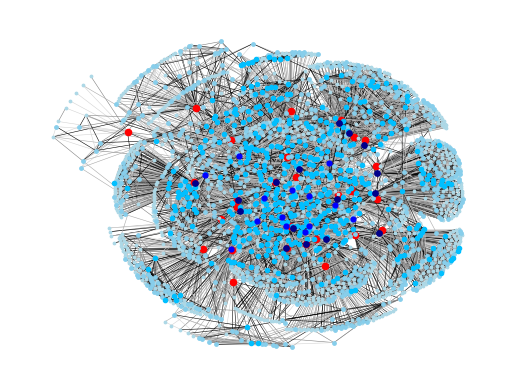

<Figure size 2000x2000 with 0 Axes>

In [ ]:
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=red_nodes, node_color='red', node_size=20)
nx.draw_networkx_nodes(G, pos, nodelist=lightblue_nodes, node_color='lightblue', node_size=3)
nx.draw_networkx_nodes(G, pos, nodelist=skyblue_nodes, node_color='skyblue', node_size=6)
nx.draw_networkx_nodes(G, pos, nodelist=cornflowerblue_nodes, node_color='deepskyblue', node_size=9)
nx.draw_networkx_nodes(G, pos, nodelist=blue_nodes, node_color='blue', node_size=12)
nx.draw_networkx_nodes(G, pos, nodelist=darkblue_nodes, node_color='darkblue', node_size=15)
nx.draw_networkx_edges(G, pos, edge_color=random_edge_colors, width=0.4)

plt.axis('off')
plt.figure(figsize=(20, 20))
plt.rcParams.update({'figure.dpi': 300})
plt.savefig("Image.png", dpi=300)
plt.show()

In [5]:
n_st = list(G.nodes())
CCU = sorted([(node, nx.closeness_centrality(G, u=node)) for node in n_st], key=lambda i: i[1], reverse=True)
BCU = sorted(list(nx.betweenness_centrality(G, k=2000).items()), key=lambda i: i[1], reverse=True)
ECU = sorted(list(nx.eigenvector_centrality(G).items()), key=lambda i: i[1], reverse=True)

def print_central_student(students, way):
    for IDVK, metrica in students:
        for acc in accounts:
            if acc.id == IDVK and acc.name is not None:
                print(f"Центральный студент в группе по {way}: {acc.name} (центральность {metrica})")
                return

print_central_student(CCU, "близости")
print_central_student(BCU, "посредничеству")
print_central_student(ECU, "собственному значению")

Центральный студент в группе по близости: Кичибеков Рахман Фархадович (центральность 0.3565094356412736)
Центральный студент в группе по посредничеству: Цыганков Никита Денисович (центральность 0.07979018781089081)
Центральный студент в группе по собственному значению: Латынова Татьяна Алексеевна (центральность 0.2030692461926341)
